In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
bins = np.arange(1, 2049)
cs137 = np.loadtxt("../data/cs137_G20.TKA")
co57 = np.loadtxt("../data/co57_G20.TKA")
pb210 = np.loadtxt("../data/pb210_G20.TKA")
# na22 = np.loadtxt("../data/na22_G20.TKA")

# plt.plot(bins, pb210, ls='none', marker='x', ms=2)

In [3]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

In [4]:
def get_values(bins, counts, start=0, stop=-1, p0=[200.0, -1, 50.0], plot=True):
    p0[1] = (stop-start) / 2 if p0[1] == -1 else p0[1]
    (A, mu, sigma), pcov = sc.optimize.curve_fit(gauss, bins[start:stop], counts[start:stop], p0=p0, method='dogbox')
    coefs_err = unp.uarray((A, mu, sigma), np.sqrt(np.diag(pcov)))
    if plot:
        plt.plot(bins[start:stop], counts[start:stop], ls='none', marker='x', ms=2)
        plt.show()
        x = np.linspace(0, 2048, 400)
        y = gauss(x, A, mu, sigma)
        plt.plot(x, y)
        plt.plot(bins, counts, ls='none', marker='x', ms=2)
        plt.axvline(mu)
        plt.show()
    return coefs_err

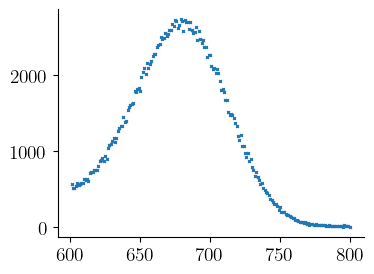

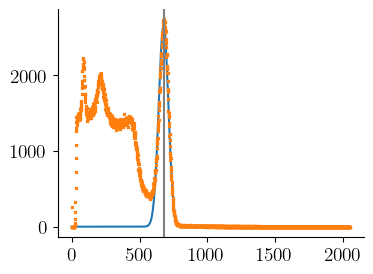

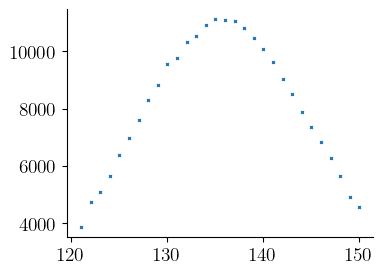

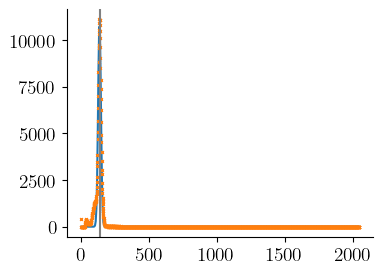

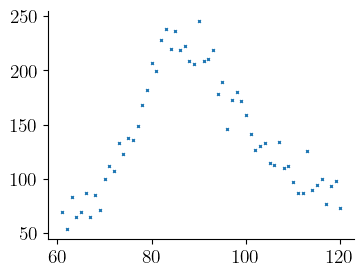

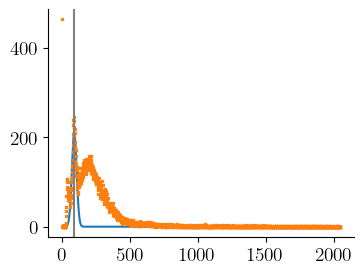

In [49]:
_, x_pic_cs137, *_ = get_values(bins, cs137, 600, 800, p0=[600, 700, 100])
_, x_pic_co57, *_ = get_values(bins, co57, 120, 150, p0=[1.0, 130, 1.0])
_, x_pic_pb210, *_ = get_values(bins, pb210, 60, 120)
# _, x_pic_na22, *_ = get_values(bins, na22, 5)

[ 4.90413468 24.38266505  1.97650181]
[0.0009729859531000546+/-3.3896259341629405e-05
 0.003935339295800012+/-0.006375278065608557]


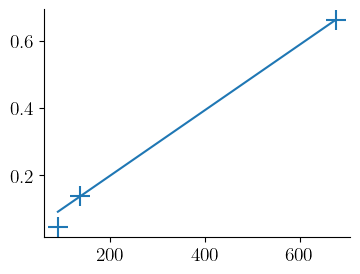

In [45]:
x = (
    x_pic_cs137.n,
    x_pic_co57.n,
    x_pic_pb210.n,
    # x_pic_na22.n
)
w = 1/np.array((
    x_pic_cs137.s,
    x_pic_co57.s,
    x_pic_pb210.s,
    # x_pic_na22.s
))
print(w)
y = (
    GAMMA_CS137,
    GAMMA_CO57,
    GAMMA_PB210,
    # GAMMA_NA22
)

coefs, cov = np.polyfit(x, y, deg=1, cov=True, w=w)
coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
print(coefs_err)
plt.plot(x, np.poly1d(coefs)(x))

plt.scatter(x, y)